In [16]:
import numpy as np
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
%matplotlib inline
jtplot.style()

In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms

In [18]:
# cuda flag
use_gpu = torch.cuda.is_available()

In [19]:
# Load in data
batch_size = 32

transform = transforms.Compose([transforms.ToTensor()])

mnist = datasets.MNIST('./', download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True, num_workers=2)

In [20]:
labels = mnist.train_labels.numpy()
images = mnist.train_data.numpy()
images = np.vstack([images[labels == l][:50] for l in [0, 1]])
labels = np.hstack([labels[labels == l][:50] for l in [0, 1]])

images = torch.from_numpy(images/255).type(torch.FloatTensor)
labels = torch.LongTensor(labels)

In [21]:
from dgm import DeepGenerativeModel, LabelledLoss, train_dgm, generate_label

ratio = batch_size/100
model = DeepGenerativeModel(ratio, [28 * 28, 2, 32, 256])

if use_gpu: model = model.cuda()

objective = LabelledLoss(n_labels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [22]:
train_dgm(model, dataloader, [images, labels], optimizer, objective, labels=[0, 1], epochs=50)

Epoch: 0	 labelled loss: 1.896517276763916, unlabelled loss: 0.5827776789665222


Epoch: 1	 labelled loss: 2.2179977893829346, unlabelled loss: 0.4726898968219757


Epoch: 2	 labelled loss: 1.409180760383606, unlabelled loss: 0.38433364033699036


Epoch: 3	 labelled loss: 0.9670472741127014, unlabelled loss: 0.2893591523170471


Epoch: 4	 labelled loss: -0.32678794860839844, unlabelled loss: 0.17188061773777008


Epoch: 5	 labelled loss: -1.0057353973388672, unlabelled loss: 0.048095379024744034


Epoch: 6	 labelled loss: -0.5366787910461426, unlabelled loss: -0.07704093307256699


Epoch: 7	 labelled loss: -1.1330641508102417, unlabelled loss: -0.22462545335292816


Epoch: 8	 labelled loss: -2.2454559803009033, unlabelled loss: -0.3652370572090149


Epoch: 9	 labelled loss: -1.8646522760391235, unlabelled loss: -0.5054188966751099


Epoch: 10	 labelled loss: -3.21476411819458, unlabelled loss: -0.6653633713722229


Epoch: 11	 labelled loss: -4.268867015838623, unlabelled loss: -0.8474473357200623


Epoch: 12	 labelled loss: -6.005659103393555, unlabelled loss: -1.063108205795288


Epoch: 13	 labelled loss: -4.94369649887085, unlabelled loss: -1.2673161029815674


Epoch: 14	 labelled loss: -6.313908100128174, unlabelled loss: -1.4729825258255005


Epoch: 15	 labelled loss: -8.190937042236328, unlabelled loss: -1.7155872583389282


Epoch: 16	 labelled loss: -8.336145401000977, unlabelled loss: -1.9805899858474731


Epoch: 17	 labelled loss: -10.016700744628906, unlabelled loss: -2.2219669818878174


Epoch: 18	 labelled loss: -11.465984344482422, unlabelled loss: -2.54290771484375


Epoch: 19	 labelled loss: -13.376657485961914, unlabelled loss: -2.8217852115631104


Epoch: 20	 labelled loss: -13.8670654296875, unlabelled loss: -3.172069787979126


Epoch: 21	 labelled loss: -15.2020845413208, unlabelled loss: -3.49910569190979


Epoch: 22	 labelled loss: -16.286001205444336, unlabelled loss: -3.89546799659729


Epoch: 23	 labelled loss: -17.841833114624023, unlabelled loss: -4.284841060638428


Epoch: 24	 labelled loss: -19.56422996520996, unlabelled loss: -4.688230514526367


Epoch: 25	 labelled loss: -22.847122192382812, unlabelled loss: -5.165212154388428


Epoch: 26	 labelled loss: -23.081056594848633, unlabelled loss: -5.587714672088623


Epoch: 27	 labelled loss: -24.546276092529297, unlabelled loss: -6.180479049682617


Epoch: 28	 labelled loss: -27.675487518310547, unlabelled loss: -6.647030830383301


Epoch: 29	 labelled loss: -27.114280700683594, unlabelled loss: -7.306088924407959


Epoch: 30	 labelled loss: -32.97051239013672, unlabelled loss: -7.913683891296387


Epoch: 31	 labelled loss: -36.501338958740234, unlabelled loss: -8.537222862243652


Epoch: 32	 labelled loss: -36.800506591796875, unlabelled loss: -9.258954048156738


Epoch: 33	 labelled loss: -39.77744674682617, unlabelled loss: -10.071054458618164


Epoch: 34	 labelled loss: -44.29542922973633, unlabelled loss: -10.824482917785645


Epoch: 35	 labelled loss: -44.930992126464844, unlabelled loss: -11.745256423950195


Epoch: 36	 labelled loss: -52.171424865722656, unlabelled loss: -12.642754554748535


Epoch: 37	 labelled loss: -58.10642623901367, unlabelled loss: -13.71587085723877


Epoch: 38	 labelled loss: -60.72066879272461, unlabelled loss: -14.749204635620117


Epoch: 39	 labelled loss: -66.61206817626953, unlabelled loss: -16.00227928161621


Epoch: 40	 labelled loss: -70.49613189697266, unlabelled loss: -17.263526916503906


Epoch: 41	 labelled loss: -75.55984497070312, unlabelled loss: -18.78597068786621


Epoch: 42	 labelled loss: -78.46482849121094, unlabelled loss: -20.309898376464844


Epoch: 43	 labelled loss: -80.9176025390625, unlabelled loss: -21.843725204467773


Epoch: 44	 labelled loss: -91.6764907836914, unlabelled loss: -23.569988250732422


Epoch: 45	 labelled loss: -100.71566772460938, unlabelled loss: -25.74495506286621


Epoch: 46	 labelled loss: -111.29438781738281, unlabelled loss: -27.805768966674805


Epoch: 47	 labelled loss: -110.53888702392578, unlabelled loss: -30.213844299316406


Epoch: 48	 labelled loss: -134.76036071777344, unlabelled loss: -32.90018081665039


Epoch: 49	 labelled loss: -147.38131713867188, unlabelled loss: -36.21329879760742


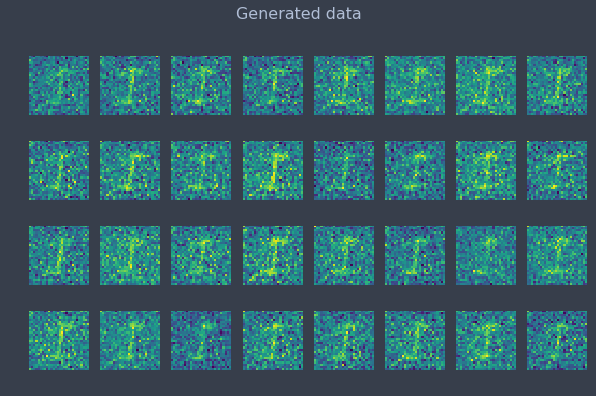

In [27]:
f, axarr = plt.subplots(4, 8, figsize=(10, 6))

z = torch.randn(batch_size, 32)
label = generate_label(batch_size, 1)

input = (Variable(z), Variable(label))
generated = model.generate(*input)

plt.suptitle("Generated data")

for i in range(batch_size):
    images = generated.data.numpy().reshape(-1, 28, 28)
    axarr[i//8, i%8].imshow(images[i])
    axarr[i//8, i%8].axis("off")